In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import os 
from scipy.signal import find_peaks
import pandas as pd
from scipy import signal, fft
from datetime import datetime
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans, AffinityPropagation
from signaltk import constants as cst
from scipy.signal import detrend

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["CMU Serif"]
})

DIR = os.path.join(os.path.dirname(os.getcwd()), "img")
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), "data")
DPI = 300

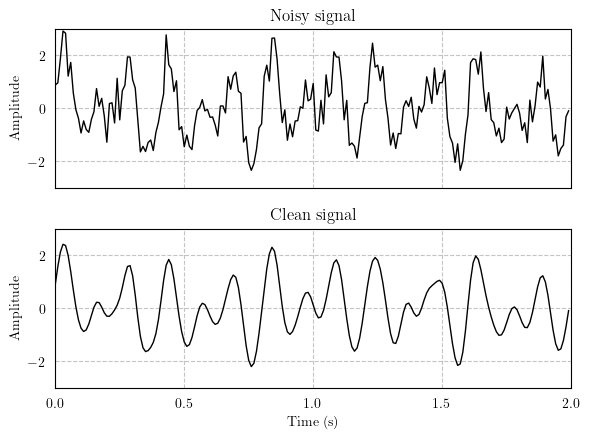

In [2]:
np.random.seed(0)  # For reproducibility

# --- Signal Parameters ---
frequency = 5  # Hz
amplitude = 1.0
sampling_rate = 100  # Samples per second
duration = 2  # Seconds

# --- Generate Time Vector ---
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# --- Generate Clean Sine Wave (sum of two frequencies for more complexity) ---
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t) + amplitude * np.sin(2 * np.pi * frequency * 1.5 * t)

# --- Generate Noise ---
# Mean of the Gaussian noise (typically 0 for white noise)
noise_mean = 0
# Standard deviation of the Gaussian noise (controls noise intensity)
noise_std_dev = 0.5
noise = np.random.normal(noise_mean, noise_std_dev, len(t))

# --- Add Noise to Signal ---
noisy_signal = clean_signal + noise

# --- Butterworth Low-pass Filter Design ---
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.25 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# --- Filter Parameters ---
cutoff = 7  # Hz, just above the signal frequency
order = 4

# --- Apply Low-pass Filter to Noisy Signal ---
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff, sampling_rate, order)


# --- Plotting to match the pasted image ---
fig, axs = plt.subplots(nrows=2, figsize=(6, 4.5), sharex=True, sharey=True)

axs[0].plot(t, noisy_signal, 'k', linewidth=1, zorder=25)
axs[0].set_title('Noisy signal')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, filtered_signal, 'k', linewidth=1, zorder=25)
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Clean signal')

for ax in axs:
    ax.set_xlim(0, duration)
    ax.set_ylim(-3, 3)
    ax.set_xticks(np.arange(0, duration + 0.5, 0.5))
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/signal_illustration.pdf", dpi=DPI, transparent=True)
plt.show()

### Signals

In [3]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [4]:
raw_signals = pd.read_pickle(f"{DATA_DIR}/raw_signals.pkl")
crsp = pd.read_pickle(f"{DATA_DIR}/crsp.pkl")

In [5]:
aa = raw_signals.groupby("permno").count().sort_values("b2m")
aa = aa[aa["b2m"] == 481].index
[print(x) for x in crsp.xs("2024-12-31").loc[aa, "comnam"].sort_values()]

3M CO
A P A CORP
A T & T INC
A T I INC
ABBOTT LABORATORIES
ACME UNITED CORP
ADVANCED MICRO DEVICES INC
AFLAC INC
AGILYSYS INC
AIR PRODUCTS & CHEMICALS INC
AIR T INC
ALASKA AIRGROUP INC
ALLETE INC
ALLIANT ENERGY CORP
ALLIENT INC
ALTRIA GROUP INC
AMEREN CORP
AMERICAN ELECTRIC POWER CO INC
AMERICAN EXPRESS CO
AMERICAN FINANCIAL GROUP INC NEW
AMERICAN INTERNATIONAL GROUP INC
AMERICAN SHARED HOSPITAL SVCS
AMERICAN STATES WATER CO
AMGEN INC
AMPCO PITTSBURGH CORP
AMTECH SYSTEMS INC
APPLE INC
APPLIED INDUSTRIAL TECHS INC
ARCHER DANIELS MIDLAND CO
ARROW ELECTRONICS INC
ASCENT INDUSTRIES CO
ASHLAND INC 2022
ATMOS ENERGY CORP
AUTOMATIC DATA PROCESSING INC
AVISTA CORP
AVNET INC
BADGER METER INC
BALL CORP
BANK OF AMERICA CORP
BANK OF HAWAII CORP
BANK OF NEW YORK MELLON CORP
BARNWELL INDUSTRIES INC
BAXTER INTERNATIONAL INC
BECTON DICKINSON & CO
BEL FUSE INC
BERKSHIRE HATHAWAY INC DEL
BIGLARI HOLDINGS INC
BLACK HILLS CORP
BOEING CO
BRINKER INTERNATIONAL INC
BRISTOL MYERS SQUIBB CO
BRUNSWICK CORP
C M 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [6]:
[print(x) for x in crsp["comnam"].sort_values().unique()]

1 800 ATTORNEY INC
1 800 CONTACTS INC
1 800 FLOWERS COM INC
1 POTATO 2 INC
10X CAPITAL VENTURE ACQ CORP
10X GENOMICS INC
1225 MAPLE CORP
1347 CAPITAL CORP
1347 PROPERTY INSURANCE HLDS INC
1411 HOLDING CO
180 LIFE SCIENCES CORP
1847 GOEDEKER INC
1847 HOLDINGS LLC
1895 BANCORP OF WI INC NEW
1895 BANCORP OF WISCONSIN INC
1LIFE HEALTHCARE INC
1ST BANCORP
1ST BERGEN BANCORP
1ST CENTURY BANKSHARES INC
1ST CONSTITUTION BANCORP
1ST INDEPENDENCE FNL GROUP INC
1ST NATIONAL FILM CORP
1ST PACIFIC BANCORP CA
1ST SOURCE CORP
1ST STATE BANCORP INC
1ST UNITED BANCORP
1ST UNITED BANCORP INC
1ST WASHINGTON BANCORP INC
1STDIBS COM INC
2 I INC
2 U INC
202 DATA SYS INC
2020 CHINACAP ACQUIRCO INC
20TH CENTURY INDUSTRIES
20TH CENTURY INDUSTRIES CA
21ST CENTURY DISTRIBUTION CORP
21ST CENTURY FILMS CORP
21ST CENTURY HOLDING CO
21ST CENTURY INSURANCE GROUP
21ST CENTURY ROBOTICS
22ND CENTURY GROUP INC
23ANDME HOLDING CO
24 7 MEDIA INC
24 7 REAL MEDIA INC
26 CAPITAL ACQUISITION CORP
2SEVENTY BIO INC
3 C I COMPLET

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [7]:
subset = [
    "UNITED AIR LINES INC",
    "APPLE COMPUTER INC",
    "APPLE INC",
    "FORD MOTOR CO",
    "FORD MOTOR CO DEL",
    "WALMART INC",
    "GENERAL MOTORS CO",
    "GENERAL ELECTRIC CO",
    "AMERICAN TELEPHONE & TELEG CO",
    "GENERAL MOTORS CORP",
    "PROCTER & GAMBLE CO",
    "PEPSICO INC",
    "APPLE INC"
]

crsp[crsp["comnam"].isin(subset)].xs("2024-12-31")

,comnam,ret,shrout,vol,prc,altprc,exchcd,siccd,ticker,cusip,exchange,industry,ret_adj,excess_ret,dollar_vol,mktcap
permno,,,,,,,,,,,,,,,,
12060,GENERAL ELECTRIC CO,-0.082839,1082294.0,1115095.0,166.78999,166.78999,1,3511,GE,36960430,NYSE,Manufacturing,-0.082839,-0.086539,185986683.89905,180515805.43706
12369,GENERAL MOTORS CO,-0.039576,1099596.0,2109221.0,53.27,53.27,1,3711,GM,37045V10,NYSE,Manufacturing,-0.039576,-0.043276,112358202.67,58575478.92
13856,PEPSICO INC,-0.061395,1371989.0,1413091.0,152.06,152.06,3,2086,PEP,71344810,NASDAQ,Manufacturing,-0.061395,-0.065095,214874617.46,208624647.34
14593,APPLE INC,0.055155,15115823.0,9710426.0,250.42,250.42,3,3571,AAPL,03783310,NASDAQ,Manufacturing,0.055155,0.051455,2431684878.92,3785304395.66
18163,PROCTER & GAMBLE CO,-0.064766,2355042.0,1338912.0,167.64999,167.64999,1,2844,PG,74271810,NYSE,Manufacturing,-0.064766,-0.068466,224468583.41088,394822767.74958
25785,FORD MOTOR CO DEL,-0.110512,3903437.0,12187469.0,9.9,9.9,1,3711,F,34537086,NYSE,Manufacturing,-0.110512,-0.114212,120655943.1,38644026.3
55976,WALMART INC,-0.021,8033386.0,3821318.0,90.35,90.35,1,5311,WMT,93114210,NYSE,Retail,-0.021000,-0.0247,345256081.3,725816425.1


In [8]:
id_mapping = {
    "Apple Inc.": 14593,
    "Walmart Inc": 55976,
}

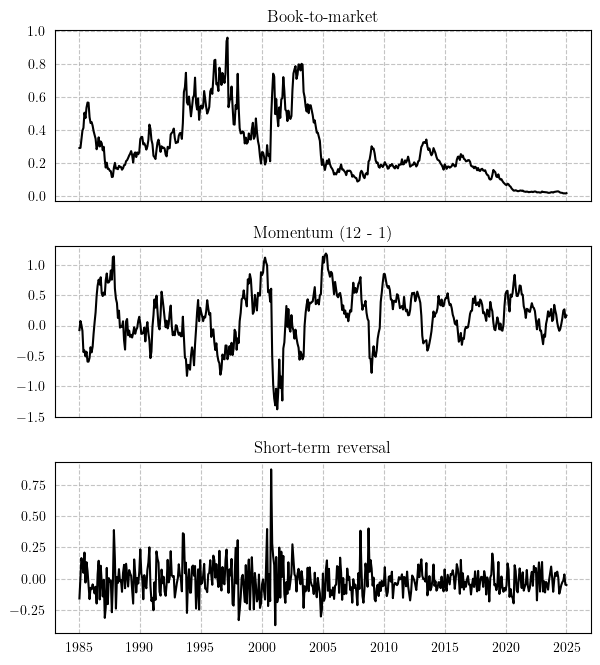

In [9]:
sig = {"b2m": "Book-to-market", "mom_12_1": "Momentum (12 - 1)", "strev": "Short-term reversal"}
_id = 55976  # Walmart Inc.
_id = 16847
_id = 12490  # IBM
# _id = 12369
# _id = 12060
_id = 18163  # Procter & Gamble Co.
_id = 13856  # PepsiCo Inc.
_id = 14593  # Apple Inc.
start_dt = datetime(1984, 12, 31)
fig, axs = plt.subplots(nrows=len(sig), figsize=(6, 2.25 * len(sig)), sharex=True, sharey=False)

for ax, s in zip(axs, sig):
    s_vals = raw_signals.loc[start_dt:].xs(_id, level=1)[s].dropna()
    ax.plot(s_vals, c="black")
    # ax.set_xlim(0, duration)
    # ax.set_ylim(-3, 3)
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.set_title(sig[s])
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/inv_signal_example.pdf", dpi=DPI, transparent=True)
plt.show()

In [10]:
# https://www.mathworks.com/help/ident/ref/iddata.detrend.html

<Axes: >

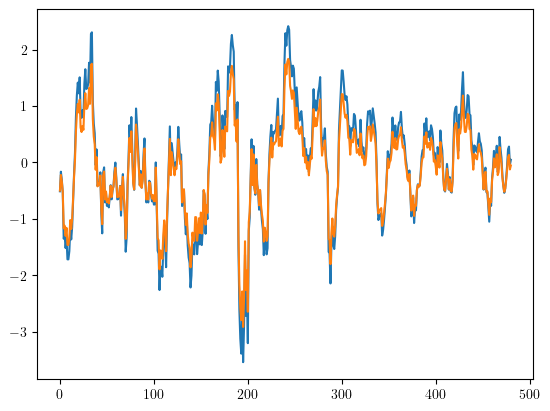

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, Normalizer, KernelCenterer

s_vals = raw_signals.loc[start_dt:].xs(_id, level=1)["mom_12_1"].dropna()
transformer = StandardScaler().fit(s_vals.to_frame().dropna())
pd.Series(transformer.transform(s_vals.to_frame().dropna()).flatten()).plot()

s_vals = raw_signals.loc[start_dt:].xs(_id, level=1)["mom_12_1"].dropna()
transformer = RobustScaler().fit(s_vals.to_frame().dropna())
pd.Series(transformer.transform(s_vals.to_frame().dropna()).flatten()).plot()

<Axes: >

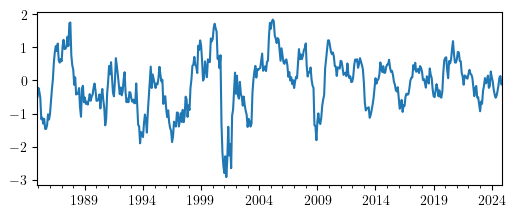

In [12]:
s_vals = raw_signals.loc[start_dt:].xs(_id, level=1)["mom_12_1"]
transformer = RobustScaler().fit(s_vals.to_frame())
pd.Series(transformer.transform(s_vals.to_frame()).flatten(), index=s_vals.index).plot(figsize=(6, 2.25))

### Use the below to simulate signals

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pykalman import KalmanFilter

# # --- 1. Simulate a Non-Stationary Signal (same as before) ---
# np.random.seed(42)
# time_points = 500
# t = np.arange(time_points)
# true_mean = 10 + 5 * np.sin(t / 50) + 0.02 * t
# true_std_dev = 2 + 1 * np.cos(t / 80) + 0.01 * t
# true_variance = true_std_dev**2
# signal = np.random.normal(loc=true_mean, scale=true_std_dev, size=time_points)

# plt.figure(figsize=(14, 6))
# plt.plot(t, signal, label='Observed Signal', alpha=0.7)
# plt.plot(t, true_mean, 'r--', label='True Mean')
# plt.plot(t, true_mean + true_std_dev, 'g:', label='True Std Dev Bands')
# plt.plot(t, true_mean - true_std_dev, 'g:')
# plt.title('Simulated Non-Stationary Signal')
# plt.xlabel('Time Step')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()


In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from filterpy.kalman import KalmanFilter
# from filterpy.common import Q_discrete_white_noise

# # --- 1. Simulate a Non-Stationary Signal (same as before) ---
# np.random.seed(42) # For reproducibility

# time_points = len(s_vals)
# t = np.arange(time_points)

# # Generate the signal
# signal = detrend(s_vals)


# # --- 2. Implement the Adaptive Kalman Filter using filterpy ---

# # Initialize the KalmanFilter object
# # State dimension (dim_x) = 1 (for mean)
# # Measurement dimension (dim_z) = 1 (for signal sample)
# kf = KalmanFilter(dim_x=1, dim_z=1)

# # Initial state estimation (x) and its covariance (P)
# kf.x = np.array([[signal[0]]]) # Initial estimate of the mean
# kf.P = np.array([[100.0]])   # High initial uncertainty in mean estimate

# # State transition function (F)
# # Mean follows a random walk, so F is just 1
# kf.F = np.array([[1.]])

# # Measurement function (H)
# # Observation is directly the mean, so H is just 1
# kf.H = np.array([[1.]])

# # Process noise covariance (Q)
# # Represents how much the true mean is allowed to change between steps
# # Tune this value: larger Q means filter trusts new measurements more.
# Q_mu_scalar = 0.01 # Same as Q_mu from previous examples
# kf.Q = np.array([[Q_mu_scalar]])

# # Adaptive R_k parameters
# # Initial estimate of measurement noise covariance (R_k)
# # Use variance of initial segment as a start
# R_k_scalar = np.var(signal[:12])
# kf.R = np.array([[R_k_scalar]]) # Set initial R for the filter

# alpha_R = .05 # Smoothing factor for R_k adaptation (0 to 1)
# # alpha_R = 0.10 # Smoothing factor for R_k adaptation (0 to 1)

# # Store results
# mean_estimates = [kf.x[0,0]] # Initial mean estimate
# std_dev_estimates = [] # We'll derive this from the adaptive R_k

# # Main Kalman Filter Loop
# for i in range(1, time_points):
#     z_k = signal[i] # Current observation

#     # --- Prediction Step ---
#     kf.predict()

#     # --- Update Step ---
#     kf.update(z_k)

#     # Store estimated mean
#     mean_estimates.append(kf.x[0,0])

#     # --- Adapt R_k (Measurement Noise Covariance) ---
#     # The innovation (measurement residual) for the current step is stored in kf.y
#     innovation = kf.y[0,0]

#     # Update R_k using EWMA of squared innovations
#     R_k_scalar = alpha_R * (innovation**2) + (1 - alpha_R) * R_k_scalar
#     kf.R = np.array([[R_k_scalar]]) # Update filter's R for the next iteration

#     # Store the square root of R_k as our estimated standard deviation
#     std_dev_estimates.append(np.sqrt(R_k_scalar))

# # Pad std_dev_estimates for the initial point (since it starts from i=1)
# std_dev_estimates.insert(0, np.sqrt(np.var(signal[:12]))) # Use initial R_k's sqrt

# # --- 3. Plotting Results ---
# plt.figure(figsize=(14, 8))

# plt.subplot(2, 1, 1)
# plt.plot(t, signal, label='Observed Signal', alpha=0.7)
# # plt.plot(t, true_mean, 'r--', label='True Mean')
# plt.plot(t, mean_estimates, 'b-', label='KF Estimated Mean (Adaptive R)')
# plt.title('Kalman Filter Estimation of Time-Varying Mean (Adaptive R with FilterPy)')
# plt.xlabel('Time Step')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)

# plt.subplot(2, 1, 2)
# # plt.plot(t, true_std_dev, 'r--', label='True Standard Deviation')
# plt.plot(t, std_dev_estimates, 'm-', label='KF Estimated Std Dev (from Adaptive R)')
# plt.title('Estimated Standard Deviation (from Adaptive Measurement Noise)')
# plt.xlabel('Time Step')
# plt.ylabel('Standard Deviation')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [15]:
# s_vals.sub(s_vals.mean()).div(s_vals.std()).plot(figsize=(6, 2.25))
# xx = pd.Series(detrend(s_vals), index=s_vals.index).div(pd.Series(std_dev_estimates, index=s_vals.index))
# xx.div(xx.std()).plot(figsize=(6, 2.25))
# plt.show()

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from filterpy.kalman import KalmanFilter

# # For reproducibility
# np.random.seed(42)

# ## ---------------------------------------------------
# ## Step 1: Generate Synthetic Heteroscedastic Data
# ## ---------------------------------------------------
# # The data will have a true mean that follows a sine wave and two noise regimes.
# n_samples = 500
# dt = 0.1

# # True underlying mean
# true_mean = 0.5 * np.sin(np.arange(n_samples) * dt * 0.2) + 10

# # Create heteroscedastic noise (low noise -> high noise -> low noise)
# noise_std = np.ones(n_samples) * 0.2  # Low noise regime
# noise_std[150:350] = 1.5             # High noise regime
# noise = np.random.randn(n_samples) * noise_std

# # Create the final measured time series
# measurements = true_mean + noise

# ## ---------------------------------------------------
# ## Step 2: Initialize the Kalman Filter
# ## ---------------------------------------------------
# # We are tracking one variable (the mean), so dim_x=1
# # We are measuring one variable (the value), so dim_z=1
# kf = KalmanFilter(dim_x=1, dim_z=1)

# # Define the model matrices
# kf.x = np.array([measurements[0]])  # Initial state (mean)
# kf.P = np.array([[1.]])             # Initial state covariance (uncertainty)
# kf.F = np.array([[1.]])             # State transition matrix
# kf.H = np.array([[1.]])             # Measurement function
# kf.Q = np.array([[0.01]])           # Process noise (how much we expect the mean to change)
# # kf.R will be updated dynamically in the loop

# ## ---------------------------------------------------
# ## Step 3: Run the Filter and Adapt R
# ## ---------------------------------------------------
# # Lists to store results
# estimated_means = []
# estimated_variances = []
# residuals = []
# residual_window_size = 20 # Window to estimate R

# for z in measurements:
#     # Predict the next state
#     kf.predict()

#     # Update the filter with the new measurement
#     kf.update(z)

#     # Store the results
#     estimated_means.append(kf.x[0])
#     estimated_variances.append(kf.P[0, 0])

#     # --- Adaptive R Estimation ---
#     # Calculate the residual (innovation)
#     residual = z - kf.H @ kf.x_prior
#     residuals.append(residual[0])
    
#     # Use a moving window of residuals to estimate R for the *next* step
#     if len(residuals) > residual_window_size:
#         # Variance of recent residuals is a good estimate for R
#         # Add a small epsilon for numerical stability
#         r_est = np.var(residuals[-residual_window_size:]) + 1e-6 
#         kf.R = np.array([[r_est]])

# # Convert lists to numpy arrays for plotting
# estimated_means = np.array(estimated_means)
# estimated_variances = np.array(estimated_variances)
# estimated_std = np.sqrt(estimated_variances)

# ## ---------------------------------------------------
# ## Step 4: Visualize the Results
# ## ---------------------------------------------------
# plt.style.use('seaborn-v0_8-whitegrid')
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# # Plot 1: Mean Estimation
# ax1.plot(measurements, 'o', markersize=3, color='gray', alpha=0.6, label='Noisy Measurements')
# ax1.plot(true_mean, 'k--', lw=2, label='True Mean')
# ax1.plot(estimated_means, color='b', lw=2, label='Kalman Filter Estimate')
# ax1.fill_between(
#     range(n_samples),
#     estimated_means - 1.96 * estimated_std,
#     estimated_means + 1.96 * estimated_std,
#     color='b',
#     alpha=0.2,
#     label='95% Confidence Interval'
# )
# ax1.set_title('Kalman Filter Estimation of Conditional Mean', fontsize=16)
# ax1.set_ylabel('Value')
# ax1.legend()
# ax1.grid(True)

# # Plot 2: Uncertainty (Standard Deviation)
# ax2.plot(noise_std, 'k--', lw=2, label='True Noise Std Dev')
# ax2.plot(estimated_std, color='b', lw=2, label='Estimated State Std Dev (sqrt(P))')
# ax2.set_title('Filter Uncertainty vs. True Noise', fontsize=16)
# ax2.set_xlabel('Time Step')
# ax2.set_ylabel('Standard Deviation')
# ax2.legend()
# ax2.grid(True)

# plt.tight_layout()
# plt.show()

## Signal filtering

In [17]:
raw_signals_subset = raw_signals.loc[start_dt:].xs(_id, level=1)[["b2m", "mom_12_1"]].dropna()
s_vals = raw_signals_subset["mom_12_1"]
x = pd.Series(detrend(s_vals), index=s_vals.index)
x = x.sub(x.mean()).div(x.std())  # TODO: to be replace by proper LNA

n = len(x)
fhat = fft.rfft(x.values, n)
f, Pxx_den = signal.periodogram(x, 10e3, scaling='density')

# Clustering the frequency domain representation
# cat = MiniBatchKMeans(n_clusters=2, n_init="auto", init="k-means++", random_state=1234).fit(Pxx_den.reshape(-1, 1))
# filt_val = cat.cluster_centers_.flatten().argmax()
# filt_flags = cat.labels_ == filt_val

hard_thresh = .003
filt_flags = Pxx_den > hard_thresh

filt_fhat = np.where(filt_flags, fhat, 0)
filt_x = fft.irfft(filt_fhat, n=n)

s_m = x.copy()
s_mhat = filt_x.copy()

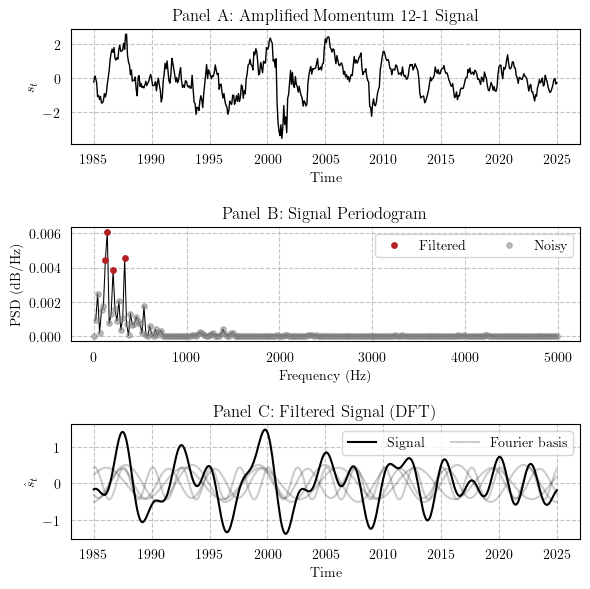

In [18]:
fig, axs = plt.subplots(nrows=3, figsize=(6, 6), sharex=False, sharey=False)

# Raw signal
axs[0].plot(x.index, x.values, 'k', linewidth=1, zorder=25)

# Periodogram

axs[1].scatter(f[filt_flags], Pxx_den[filt_flags], color='firebrick', s=15, zorder=25)
axs[1].scatter(f[~filt_flags], Pxx_den[~filt_flags], c="gray", s=15, zorder=25, alpha=0.5)
axs[1].legend(["Filtered", "Noisy"], ncols=2, loc='upper right', fontsize=10)
# axs[1].semilogy(f[1:], Pxx_den[1:], 'k', linewidth=.75, zorder=20)
axs[1].plot(f[1:], Pxx_den[1:], 'k', linewidth=.75, zorder=20)
# axs[1].set_ylim([5e-8, 1E-1])

# Filtered signal
axs[2].plot(x.index, filt_x, 'k', linewidth=1.5, zorder=25)

nn = len(filt_flags)
for i in range(nn):
    if filt_flags[i]:
        flag_i = np.array([False] * nn)
        flag_i[i] = True
        filt_i = np.where(flag_i, fhat, 0)
        fhat_i = fft.irfft(filt_i, n=n)
        axs[2].plot(x.index, fhat_i, 'k', linewidth=1.5, zorder=25, alpha=.2)

axs[2].legend(["Signal", "Fourier basis"], ncols=2, loc='upper right', fontsize=10)

for ax in axs:
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

axs[0].set_xlabel("Time")
axs[1].set_xlabel("Frequency (Hz)")
axs[2].set_xlabel("Time")
axs[0].set_ylabel("$s_{t}$")
axs[1].set_ylabel("PSD (dB/Hz)")
axs[2].set_ylabel("$\hat{s}_{t}$")
axs[0].set_title("Panel A: Amplified Momentum 12-1 Signal")
axs[1].set_title("Panel B: Signal Periodogram")
axs[2].set_title("Panel C: Filtered Signal (DFT)")

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/signal_fft.pdf", dpi=DPI, transparent=True)
plt.show()

# TODO: Value Momentum shifting

In [19]:
# Value
s_vals = raw_signals_subset["b2m"].dropna()
x = pd.Series(detrend(s_vals), index=s_vals.index)
x = x.sub(x.mean()).div(x.std())  # TODO: to be replace by proper LNA
s_v = x.copy()

n = len(x)
fhat = fft.rfft(x.values, n)
f, Pxx_den = signal.periodogram(x, 10e3, scaling='density')

# Clustering the frequency domain representation
# cat = MiniBatchKMeans(n_clusters=2, n_init="auto", init="k-means++", random_state=1234).fit(Pxx_den.reshape(-1, 1))
# filt_val = cat.cluster_centers_.flatten().argmax()
# filt_flags = cat.labels_ == filt_val

hard_thresh = .003
filt_flags = Pxx_den > hard_thresh

filt_fhat = np.where(filt_flags, fhat, 0)
s_vhat = fft.irfft(filt_fhat, n=n)

In [ ]:
pd.Series(Pxx_den, index=f).plot()

Text(0, 0.5, '$s_{t}$')

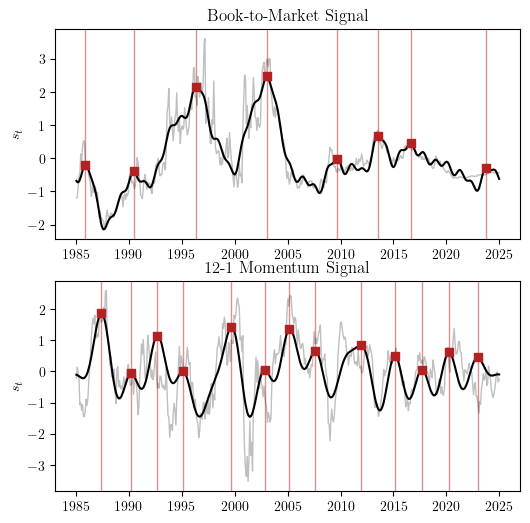

In [134]:
fig, axs = plt.subplots(nrows=2, figsize=(6, 6), sharex=False, sharey=False)

axs[0].plot(s_v.index, s_v, 'k', linewidth=1, zorder=20, alpha=0.25)
axs[0].plot(s_v.index, s_vhat, 'k', linewidth=1.5, zorder=25)

axs[1].plot(s_m.index, s_m, 'k', linewidth=1, zorder=20, alpha=0.25)
axs[1].plot(s_m.index, s_mhat, 'k', linewidth=1.5, zorder=25)

# Peaks
pks = find_peaks(s_vhat, prominence=0.25)[0]
for p in pks:
    axs[0].scatter(x=s_v.index[p], y=s_vhat[p], zorder=30, color='firebrick', s=35, marker="s")
    axs[0].axvline(x=s_v.index[p], color='firebrick', linestyle='-', alpha=0.5, linewidth=1)

pks = find_peaks(s_mhat, prominence=0.25)[0]
for p in pks:
    axs[1].scatter(x=s_m.index[p], y=s_mhat[p], zorder=30, color='firebrick', s=35, marker="s")
    axs[1].axvline(x=s_m.index[p], color='firebrick', linestyle='-', alpha=0.5, linewidth=1)

axs[0].set_title("Book-to-Market Signal")
axs[1].set_title("12-1 Momentum Signal")
axs[0].set_ylabel("$s_{t}$")
axs[1].set_ylabel("$s_{t}$")


# TODO: 4 panels, left without sync, right with sync -- Bottom pannels with the result of synching, maybe 6 panels, with the frequency domain of the combination and then the resulting signal 

In [129]:
test_values = range(60)

res = {}
s_vhat2 = pd.Series(s_vhat)
for t in test_values:
    s_m2 = s_m.copy().shift(t)
    s_mhat2 = pd.Series(s_mhat.copy()).shift(t)
    diff = s_vhat2 - s_mhat2
    res[t] = np.sqrt(diff.pow(2).mean())    

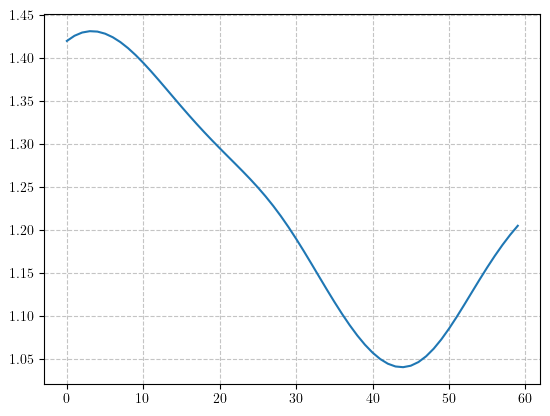

In [130]:
pd.Series(res).plot()
plt.gca().grid(ls='--', alpha=0.75, zorder=-25)

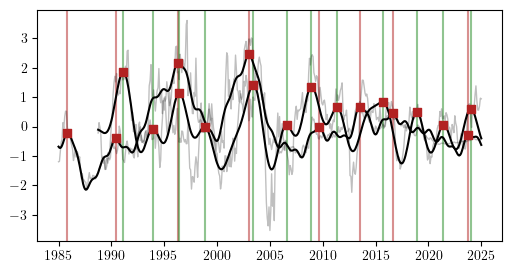

In [131]:
SHIFT = 45
fig, ax = plt.subplots(nrows=1, figsize=(6, 3), sharex=False, sharey=False)

ax.plot(s_v.index, s_v, 'k', linewidth=1, zorder=20, alpha=0.25)
ax.plot(s_v.index, s_vhat, 'k', linewidth=1.5, zorder=25)
sm_2 = s_m.copy().shift(SHIFT)
sm_2hat = pd.Series(s_mhat.copy()).shift(SHIFT).values
ax.plot(sm_2.index, sm_2, 'k', linewidth=1, zorder=20, alpha=0.25)
ax.plot(sm_2.index, sm_2hat, 'k', linewidth=1.5, zorder=25)
pks = find_peaks(s_vhat, prominence=0.25)[0]
for p in pks:
    ax.scatter(x=s_v.index[p], y=s_vhat[p], zorder=30, color='firebrick', s=35, marker="s")
    ax.axvline(x=s_v.index[p], color='firebrick', linestyle='-', alpha=0.5, linewidth=1.5)
pks = find_peaks(sm_2hat, prominence=0.25)[0]
for p in pks:
    ax.scatter(x=sm_2.index[p], y=sm_2hat[p], zorder=30, color='firebrick', s=35, marker="s")
    ax.axvline(x=sm_2.index[p], color='forestgreen', linestyle='-', alpha=0.5, linewidth=1.5)

In [132]:
shifted_ts = pd.DataFrame([s_vhat, s_mhat], index=["v", "m"]).T
shifted_ts["m"] = shifted_ts["m"].shift(SHIFT)
shifted_ts.index = s_v.index
shifted_ts.dropna(inplace=True)

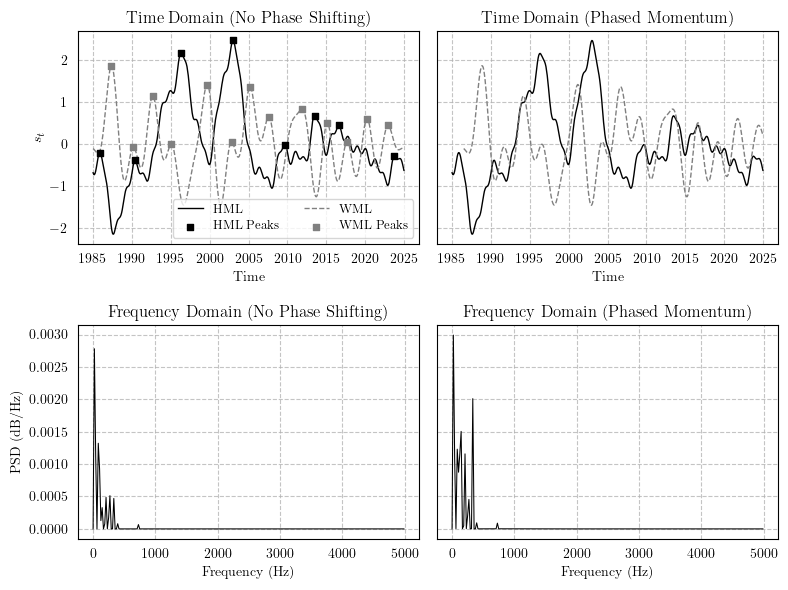

In [133]:
SHIFT = 18

shifted_ts = pd.DataFrame([s_vhat, s_mhat], index=["v", "m"]).T
shifted_ts["m"] = shifted_ts["m"].shift(SHIFT)
shifted_ts.index = s_v.index
# shifted_ts.dropna(inplace=True)

ts_cfg = {
    "HML": {
        "raw": s_v,
        "filtered": s_vhat,
        "aligned": s_vhat,
        "peaks": find_peaks(s_vhat, prominence=0.25)[0],
        "plot_kwargs": {
            "color": "black",
            "linewidth": 1,
            "ls": "-",
            "zorder": 25
        },
        "shifted":shifted_ts["v"]
    },
    "WML": {
        "raw": s_m,
        "filtered": s_mhat,
        "peaks": find_peaks(s_mhat, prominence=0.25)[0],
        "plot_kwargs": {
            "color": "gray",
            "linewidth": 1,
            "ls": "--",
            "zorder": 25
        },
        "shifted": shifted_ts["m"]
    }
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex='row', sharey='row')

# Panel 1: Fitlered signals
for i, (title, cfg) in enumerate(ts_cfg.items()):
    axs[0, 0].plot(cfg["raw"].index, cfg["filtered"], **cfg["plot_kwargs"], label=title)
    axs[0, 0].scatter(x=cfg["raw"].iloc[cfg["peaks"]].index, y=cfg["filtered"][cfg["peaks"]], zorder=30, color=cfg["plot_kwargs"]["color"], s=25, marker="s", label=f"{title} Peaks")

# Panel 2: PSD
# No phase shifting
s_blend = (s_vhat + s_mhat) / 2
n = len(s_blend)
fhat = fft.rfft(s_blend, n)
f, Pxx_den = signal.periodogram(s_blend, 10e3, scaling='density')
# axs[1, 0].semilogy(f[1:], Pxx_den[1:], 'k', linewidth=.75, zorder=20)
axs[1, 0].plot(f, Pxx_den, 'k', linewidth=.75, zorder=20)
# axs[1, 0].set_ylim([5e-8, 1E-1])

# After phase shifting
s_blend = shifted_ts.mean(axis=1)
n = len(s_blend)
fhat = fft.rfft(s_blend, n)
f, Pxx_den = signal.periodogram(s_blend, 10e3, scaling='density')
axs[1, 1].plot(f, Pxx_den, 'k', linewidth=.75, zorder=20)
# axs[1, 1].semilogy(f[1:], Pxx_den[1:], 'k', linewidth=.75, zorder=20)
# axs[1, 1].set_ylim([5e-8, 1E-1])

# Panel 1: Fitlered signals
for i, (title, cfg) in enumerate(ts_cfg.items()):
    axs[0, 1].plot(cfg["shifted"].index, cfg["shifted"], **cfg["plot_kwargs"], label=title)
    # axs[0, 0].scatter(x=cfg["raw"].iloc[cfg["peaks"]].index, y=cfg["filtered"][cfg["peaks"]], zorder=30, color=cfg["plot_kwargs"]["color"], s=25, marker="s", label=f"{title} Peaks")

axs[0, 0].set_ylabel("$s_{t}$")
axs[1, 0].set_ylabel("PSD (dB/Hz)")
axs[0, 0].set_title("Time Domain (No Phase Shifting)")
axs[1, 0].set_title("Frequency Domain (No Phase Shifting)")
axs[1, 1].set_title("Frequency Domain (Phased Momentum)")
axs[0, 1].set_title("Time Domain (Phased Momentum)")

axs[0, 0].legend(ncols=2, fontsize=9).set_zorder(35)

for i in range(2):
    axs[1, i].set_xlabel("Frequency (Hz)")
    axs[0, i].set_xlabel("Time")

for ax in axs.flatten():
    ax.grid(ls='--', alpha=0.75, zorder=-25)
    ax.tick_params(axis='both', which='major', left=False, bottom=False)

plt.tight_layout(h_pad=1.5)
plt.savefig(f"{DIR}/mom_val_shifting.pdf", dpi=DPI, transparent=True)
plt.show()

# TODO: mark the peaks, find a visualization for alignment